# Importing libraries

link to the dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importing data

In [5]:
!git clone https://github.com/MahyarFardin/Sikit-Learn.git

fatal: destination path 'Sikit-Learn' already exists and is not an empty directory.


In [6]:
df=pd.read_csv("/content/Sikit-Learn/Supervised-Learning/Hart disease/heart.csv")

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Preprocessing

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

replacing non numeric with numeric features

In [11]:
print(f'{df["ChestPainType"].unique()}\n')
print(f'{df["RestingECG"].unique()}\n')
print(f'{df["ExerciseAngina"].unique()}\n')
print(f'{df["ST_Slope"].unique()}v')

['ATA' 'NAP' 'ASY' 'TA']

['Normal' 'ST' 'LVH']

['N' 'Y']

['Up' 'Flat' 'Down']v


all of them are small enough to be replaced so lets encode them

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
encode=LabelEncoder()

In [14]:
df["ChestPainType"]=encode.fit_transform(df["ChestPainType"])
df["RestingECG"]=encode.fit_transform(df["RestingECG"])
df["ExerciseAngina"]=encode.fit_transform(df["ExerciseAngina"])
df["ST_Slope"]=encode.fit_transform(df["ST_Slope"])
df["Sex"]=encode.fit_transform(df["Sex"])

In [15]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


*Data analysis is done in the data analysis repository*

Here I just extracted some important data

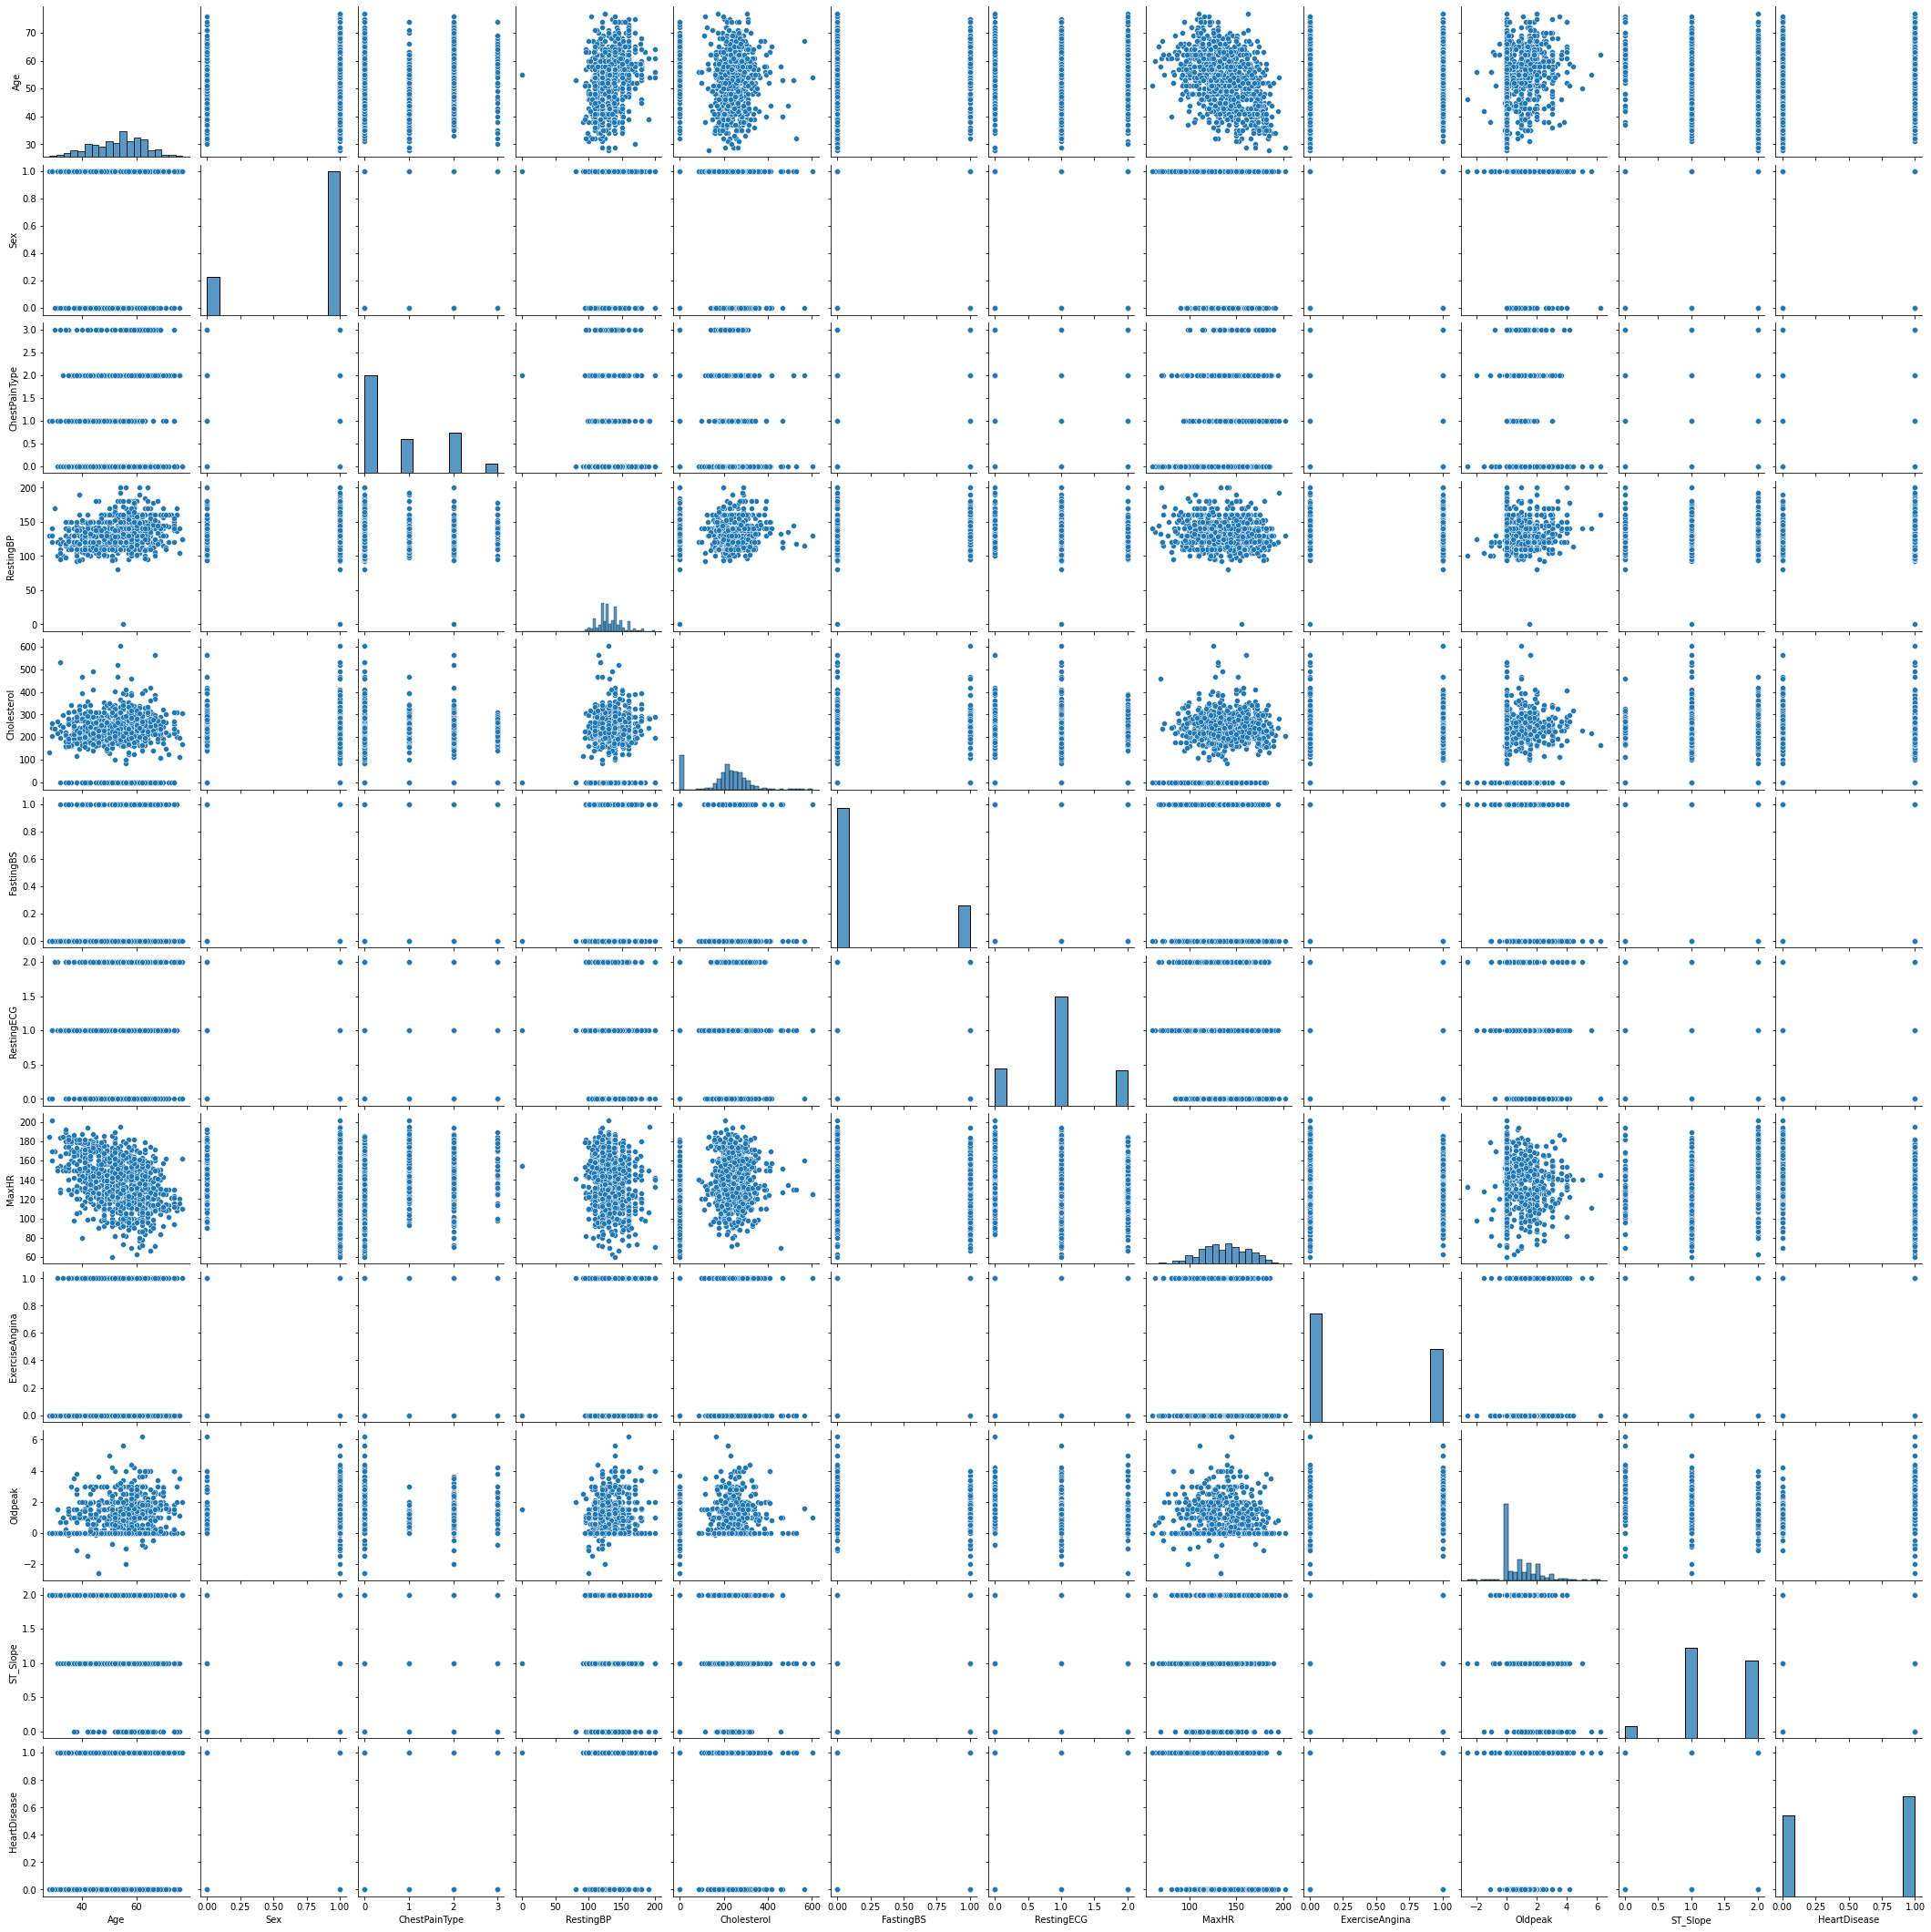

In [16]:
sns.pairplot(df)

**Removing outliers**

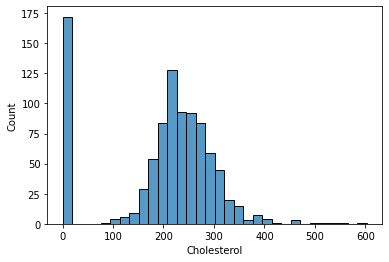

In [17]:
sns.histplot(df["Cholesterol"])

In [18]:
df=df[(df["Cholesterol"]>80) & (df["Cholesterol"]<450)]

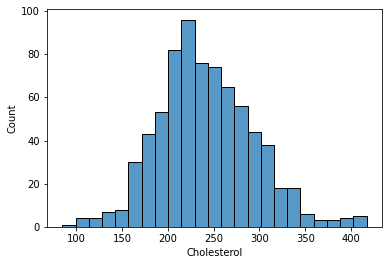

In [19]:
sns.histplot(df["Cholesterol"])

**correlation of parameters**

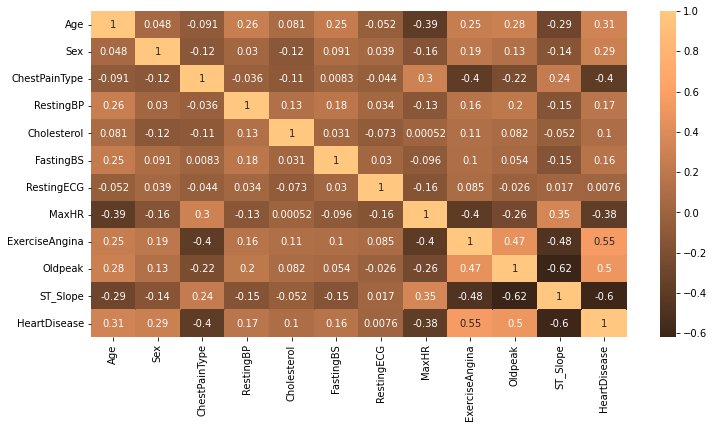

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),center=0,annot=True,cmap="copper")

**Scaling data**

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
mms=MinMaxScaler()
df=pd.DataFrame(mms.fit_transform(df),columns=df.columns)

In [27]:
x=df.drop("HeartDisease",axis=1)
y=df["HeartDisease"]

In [28]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1.0,0.333333,0.444444,0.614458,0.0,0.5,0.770992,0.0,0.015873,1.0,0.0
1,0.428571,0.0,0.666667,0.629630,0.286145,0.0,0.5,0.648855,0.0,0.174603,0.5,1.0
2,0.183673,1.0,0.333333,0.351852,0.596386,0.0,1.0,0.206107,0.0,0.015873,1.0,0.0
3,0.408163,0.0,0.000000,0.425926,0.388554,0.0,0.5,0.282443,1.0,0.253968,0.5,1.0
4,0.530612,1.0,0.666667,0.537037,0.331325,0.0,0.5,0.389313,0.0,0.015873,1.0,0.0


# Models

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

**KNN**

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
params={"n_neighbors":[x for x in range(1,30)]}

In [38]:
knn_gs=GridSearchCV(KNeighborsClassifier(),params,cv=4)

In [39]:
knn_gs.fit(x,y)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]})

In [40]:
print(knn_gs.best_params_)
print(knn_gs.best_score_)

{'n_neighbors': 5}
0.8413116921269095


In [41]:
knn=KNeighborsClassifier(n_neighbors=5)
knn_cvs=cross_val_score(knn,x,y,cv=4)

**Svm**

In [42]:
from sklearn.svm import SVC

In [43]:
params={"C":[1,10,100,1000,10000],
           "gamma":[1,.1,.001,.0001,.00001]}

In [44]:
svc_gs=GridSearchCV(SVC(),params,cv=4)

In [45]:
svc_gs.fit(x,y)

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05]})

In [46]:
print(svc_gs.best_params_)
print(svc_gs.best_score_)

{'C': 1, 'gamma': 1}
0.8412896592244419


In [47]:
svc=SVC(C=1, gamma=1)
svc_cvs=cross_val_score(svc,x,y,cv=3)

**DTC**

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
# defining the parameters
params={ "max_depth":[x for x in range(1,30)],
        "min_samples_split":[x/10 for x in range(1,10,2)],
        "min_samples_leaf":[x/10 for x in range(1,6)],
        "max_features":[x for x in range(1,11)]}

# Search model
dtc_gs=GridSearchCV(DecisionTreeClassifier(),params,cv=4)
dtc_gs.fit(x,y)

# Results
print(dtc_gs.best_params_)
print(dtc_gs.best_score_)

{'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 0.3, 'min_samples_split': 0.3}
0.8425969447708578


In [70]:
# cross validation
dtc=DecisionTreeClassifier(max_depth=4,
                          min_samples_leaf=.3,
                          min_samples_split=.3,
                          max_features=5)
dtc_cvs=cross_val_score(dtc,x,y,cv=4)

**RFC**

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
# defining the parameters
params={"n_estimators":[x for x in range(100,350,50)],
           "criterion":["gini","entropy"],
           "max_depth":[x for x in range(1,20,2)],
           "max_features":['auto',"sqrt"]}

# Search model
rfc_gs=GridSearchCV(RandomForestClassifier(),params,cv=4)
rfc_gs.fit(x,y)

# Results
print(rfc_gs.best_params_)
print(rfc_gs.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 300}
0.8589600470035254


In [87]:
# cross validation
rfc=RandomForestClassifier(criterion="entropy",
                          max_depth=7,
                          max_features="sqrt",
                          n_estimators=300,
                          oob_score=True)
rfc_cvs=cross_val_score(rfc,x,y,cv=4)

**Adb**

In [78]:
from sklearn.ensemble import AdaBoostClassifier

In [79]:
# defining the parameters
params={"n_estimators":[x for x in range(100,400,50)],
    "learning_rate":[x/10 for x in range(1,10,2)],
    "algorithm":['SAMME.R','SAMME']}

# Search model
adb_gs=GridSearchCV(AdaBoostClassifier(),params,cv=4)
adb_gs.fit(x,y)

# Results
print(adb_gs.best_params_)
print(adb_gs.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.7, 'n_estimators': 250}
0.8549133372502938


In [80]:
adb=AdaBoostClassifier(algorithm="SAMME",
                      learning_rate=.7,
                      n_estimators=250)
adb_cvs=cross_val_score(adb,x,y,cv=4)

**GB**

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
# defining the parameters
params={"loss":["exponential",'deviance'],
    "learning_rate":[x/10 for x in range(1,10,2)],
    "n_estimators":[x for x in range(100,400,50)]}

# Search model
gb_gs=GridSearchCV(GradientBoostingClassifier(),params,cv=4)
gb_gs.fit(x,y)

# Results
print(gb_gs.best_params_)
print(gb_gs.best_score_)

{'learning_rate': 0.9, 'loss': 'exponential', 'n_estimators': 200}
0.8440364277320799


In [84]:
gb=GradientBoostingClassifier(learning_rate=.4,
                             loss="exponential",
                             n_estimators=100)
gb_cvs=cross_val_score(gb,x,y,cv=4)

In [88]:
print("--------------------REPORT-------------------\n")
print("knn:")
print("gride search best parameter:"+str(knn_gs.best_params_))
print("gride search best score:"+str(knn_gs.best_score_))
print("Best RESULT: "+str(knn_cvs.max()))

print("---------------------------------------------")
print("svm:")
print("gride search best parameter:"+str(svc_gs.best_params_))
print("gride search best score:"+str(svc_gs.best_score_))
print("Best RESULT: "+str(svc_cvs.max()))

print("---------------------------------------------")
print("dtc:")
print("gride search best parameter:"+str(dtc_gs.best_params_))
print("gride search best score:"+str(dtc_gs.best_params_))
print("Best RESULT: "+str(dtc_cvs.max()))

print("---------------------------------------------")
print("rfc:")
print("gride search best parameter:"+str(rfc_gs.best_params_))
print("gride search best score:"+str(rfc_gs.best_score_))
print("Best RESULT: "+str(rfc_cvs.max()))

print("---------------------------------------------")
print("adb:")
print("gride search best parameter:"+str(adb_gs.best_params_))
print("gride search best score:"+str(adb_gs.best_score_))
print("Best RESULT: "+str(adb_cvs.max()))

print("---------------------------------------------")
print("gb:")
print("gride search best parameter:"+str(gb_gs.best_params_))
print("gride search best score:"+str(gb_gs.best_params_))
print("Best RESULT: "+str(gb_cvs.max()))

print("---------------------------------------------")

--------------------REPORT-------------------

knn:
gride search best parameter:{'n_neighbors': 5}
gride search best score:0.8413116921269095
Best RESULT: 0.9297297297297298
---------------------------------------------
svm:
gride search best parameter:{'C': 1, 'gamma': 1}
gride search best score:0.8412896592244419
Best RESULT: 0.8739837398373984
---------------------------------------------
dtc:
gride search best parameter:{'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 0.3, 'min_samples_split': 0.3}
gride search best score:{'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 0.3, 'min_samples_split': 0.3}
Best RESULT: 0.9351351351351351
---------------------------------------------
rfc:
gride search best parameter:{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 300}
gride search best score:0.8589600470035254
Best RESULT: 0.9405405405405406
---------------------------------------------
adb:
gride search best parameter:{'algorithm': 'SAMME', 

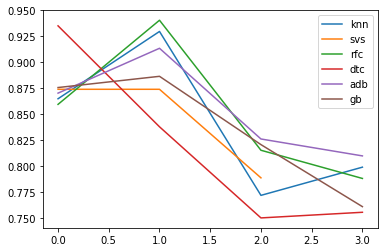

In [90]:
plt.plot(knn_cvs)
plt.plot(svc_cvs)
plt.plot(rfc_cvs)
plt.plot(dtc_cvs)
plt.plot(adb_cvs)
plt.plot(gb_cvs)
plt.legend(["knn","svs","rfc","dtc","adb","gb"])